breadth first search (BFS) and depth first search (DFS)  built-in-functions

BFS: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]
depth 1: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)]
depth 2: [(1, 30), (2, 28), (2, 9), (5, 16), (8, 33), (2, 32), (31, 24), (31, 25), (2, 27)]
depth 3: [(27, 23), (32, 22), (32, 15), (32, 20), (33, 26), (32, 14), (32, 18), (32, 29)]
depth 4: []
depth 5: []
DFS: [(0, 1), (1, 2), (2, 3), (3, 7), (3, 12), (3, 13), (13, 33), (33, 8), (8, 30), (30, 32), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (23, 25), (25, 24), (24, 27), (24, 31), (31, 28), (23, 29), (29, 26), (33, 9), (33, 19), (1, 17), (1, 21), (0, 4), (4, 6), (6, 5), (5, 10), (5, 16), (0, 11)]
depth 1: [(0, 1), (0, 2), (0, 3)

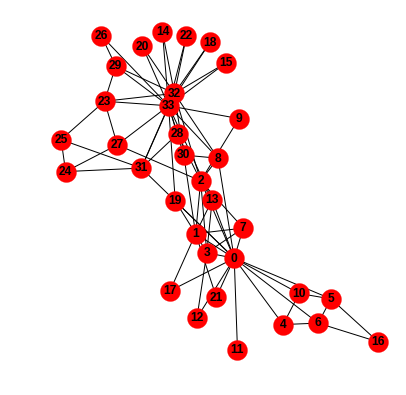

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')
print("BFS:", list(nx.bfs_edges(G, source=0)))

d1 = list(nx.bfs_edges(G, source=0, depth_limit=1))
print("depth 1:", d1)
d2 = list(nx.bfs_edges(G, source=0, depth_limit=2))
print("depth 2:", list(set(d2)-set(d1)))
d3 = list(nx.bfs_edges(G, source=0, depth_limit=3))
print("depth 3:", list(set(d3)-set(d2)))
d4 = list(nx.bfs_edges(G, source=0, depth_limit=4))
print("depth 4:", list(set(d4)-set(d3)))
d5 = list(nx.bfs_edges(G, source=0, depth_limit=5))
print("depth 5:", list(set(d5)-set(d4)))

print("DFS:", list(nx.dfs_edges(G, source=0)))

d1 = list(nx.dfs_edges(G, source=0, depth_limit=1))
print("depth 1:", d1)
d2 = list(nx.dfs_edges(G, source=0, depth_limit=2))
print("depth 2:", list(set(d2)-set(d1)))
d3 = list(nx.dfs_edges(G, source=0, depth_limit=3))
print("depth 3:", list(set(d3)-set(d2)))
d4 = list(nx.dfs_edges(G, source=0, depth_limit=4))
print("depth 4:", list(set(d4)-set(d3)))
d5 = list(nx.dfs_edges(G, source=0, depth_limit=5))
print("depth 5:", list(set(d5)-set(d4)))
d6 = list(nx.dfs_edges(G, source=0, depth_limit=6))
print("depth 6:", list(set(d6)-set(d5)))
d7 = list(nx.dfs_edges(G, source=0, depth_limit=7))
print("depth 7:", list(set(d7)-set(d6)))
d8 = list(nx.dfs_edges(G, source=0, depth_limit=8))
print("depth 8:", list(set(d8)-set(d7)))
d9 = list(nx.dfs_edges(G, source=0, depth_limit=9))
print("depth 9:", list(set(d9)-set(d8)))
d10 = list(nx.dfs_edges(G, source=0, depth_limit=10))
print("depth 10:", list(set(d10)-set(d9)))
d11 = list(nx.dfs_edges(G, source=0, depth_limit=11))
print("depth 11:", list(set(d11)-set(d10)))
d12 = list(nx.dfs_edges(G, source=0, depth_limit=12))
print("depth 12:", list(set(d12)-set(d11)))
d13 = list(nx.dfs_edges(G, source=0, depth_limit=13))
print("depth 13:", list(set(d13)-set(d12)))
d14 = list(nx.dfs_edges(G, source=0, depth_limit=14))
print("depth 14:", list(set(d14)-set(d13)))
d15 = list(nx.dfs_edges(G, source=0, depth_limit=15))
print("depth 15:", list(set(d15)-set(d14)))

naive implementation of BFS

[0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2]


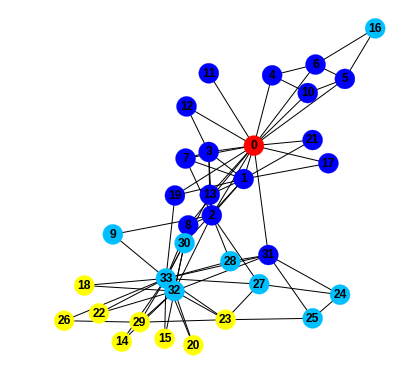

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

known = [0] * nx.number_of_nodes(G) 
dist = [-1] * nx.number_of_nodes(G)

colors = ['red', 'blue', 'deepskyblue', 'yellow', 'springgreen', 'lightskyblue', 'darkgreen', 'green', 'lightgreen', 'gray', 'lightgray']
color_map = ['black'] * nx.number_of_nodes(G)

start = 0 # start from 0
dist[start] = 0
color_map[start] = colors[dist[start]]
known[start] = 1

d = 0
while sum(known) != nx.number_of_nodes(G) :
  for n in nx.nodes(G) :
    if nx.shortest_path_length(G, start, n) == d :
      for nb in G.neighbors(n) :
        if known[nb] != 1 :
          dist[nb] = d + 1
          color_map[nb] = colors[dist[nb]]
          known[nb] = 1
  d = d + 1

print(dist)

plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color=color_map, with_labels=True, font_weight='bold')